In [15]:
%matplotlib inline
from scipy import io
import numpy as np
import matplotlib.pyplot as plt

#paper at https://www.mdpi.com/2306-5729/8/6/95
#heng's github at https://github.com/hengxu19/COGS118C/blob/master/Final_Project_Data/data_curation.ipynb

### Relevant Background Information

###### 19 scalp electrodes (channels): (Fp1, Fp2, F7, F3, Fz, F4, F8, T3, C3, Cz, C4, T4, T5, P3, Pz, P4, T6, O1, and O2)

###### sampling rate of fs = 500 Hz

###### resolution of 10 µV/mm

###### AD recordings were 13.5 mins (min=5.1, max=21.3), total 485.5 mins

###### CN recordings were 13.8 mins (min=12.5, max=16.5), total 402 mins

###### Median time from diagnosis was 25 months 

##### More found in the 2.2 Participants section

### Background on Data Structure

###### BIDS data structure (standardized) (Brain Imaging Data Structure)

##### More under 2.3 Data Structure, see for channels

### Background on Methods

## Heng's Code

In [16]:
processed_AD = np.load("AD_EEG_sub_001_processed.npy")
AD = np.load("AD_EEG_sub_001.npy")
processed_Control = np.load("Control_EEG_sub_037_processed.npy")
Control = np.load("Control_EEG_sub_037.npy")

In [17]:
np.set_printoptions(threshold=np.inf)
print()

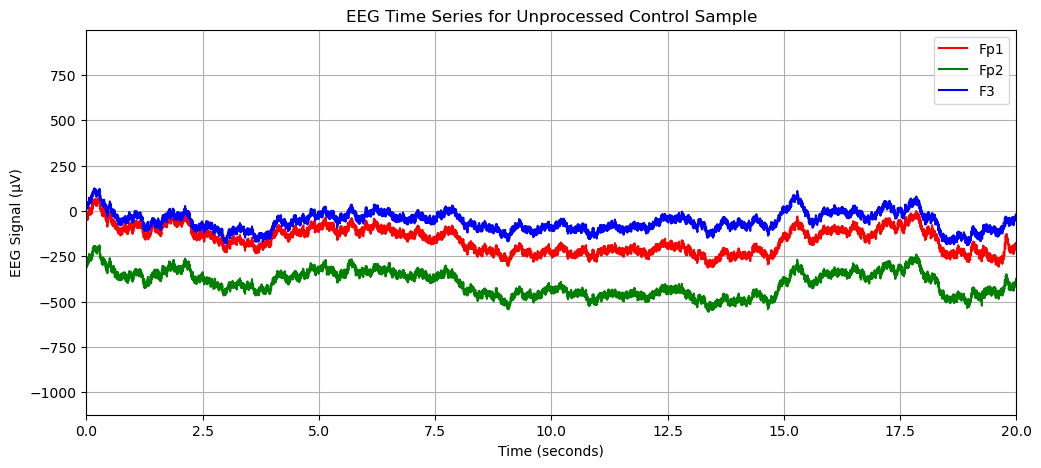

In [18]:
fs = 500  # Sampling rate (Hz)
num_samples = Control.shape[1]  # 10000 samples

time = np.linspace(0, num_samples / fs, num_samples)

channels = ['Fp1', 'Fp2', 'F3']
colors = ['r', 'g', 'b']  # Red, Green, Blue

plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(time, Control[i, :], label=channels[i], color=colors[i])

# Formatting
plt.xlim(0,20)
plt.xlabel("Time (seconds)")
plt.ylabel("EEG Signal (µV)")
plt.title("EEG Time Series for Unprocessed Control Sample")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

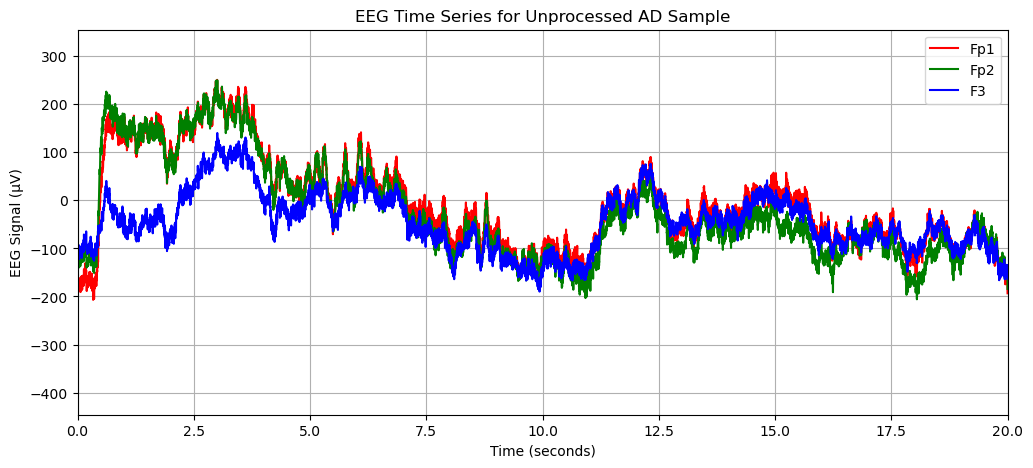

In [19]:
fs = 500  # Sampling rate (Hz)
num_samples = AD.shape[1]  # 10000 samples

time = np.linspace(0, num_samples / fs, num_samples)

channels = ['Fp1', 'Fp2', 'F3']
colors = ['r', 'g', 'b']  # Red, Green, Blue

plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(time, AD[i, :], label=channels[i], color=colors[i])

# Formatting
plt.xlim(0,20)
plt.xlabel("Time (seconds)")
plt.ylabel("EEG Signal (µV)")
plt.title("EEG Time Series for Unprocessed AD Sample")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

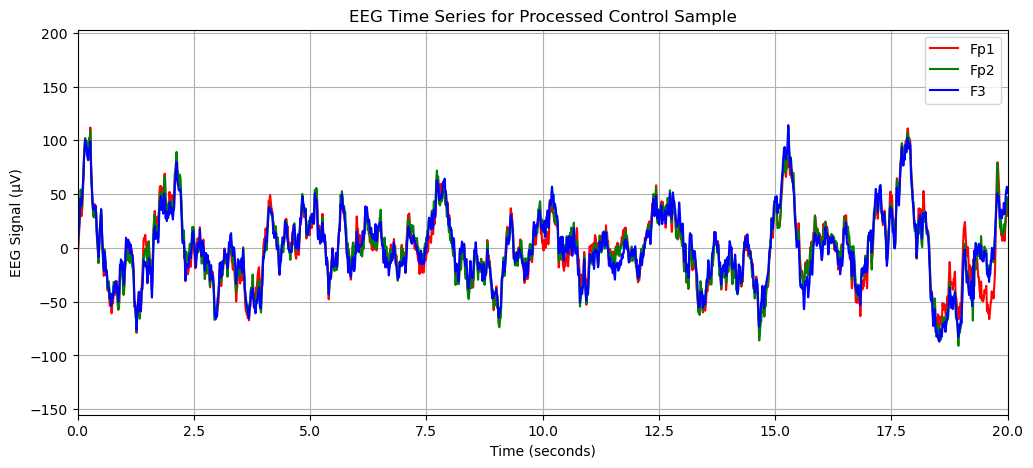

In [20]:
fs = 500  # Sampling rate (Hz)
num_samples = processed_Control.shape[1]  # 10000 samples

time = np.linspace(0, num_samples / fs, num_samples)

channels = ['Fp1', 'Fp2', 'F3']
colors = ['r', 'g', 'b']  # Red, Green, Blue

plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(time, processed_Control[i, :], label=channels[i], color=colors[i])

# Formatting
plt.xlim(0,20)
plt.xlabel("Time (seconds)")
plt.ylabel("EEG Signal (µV)")
plt.title("EEG Time Series for Processed Control Sample")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

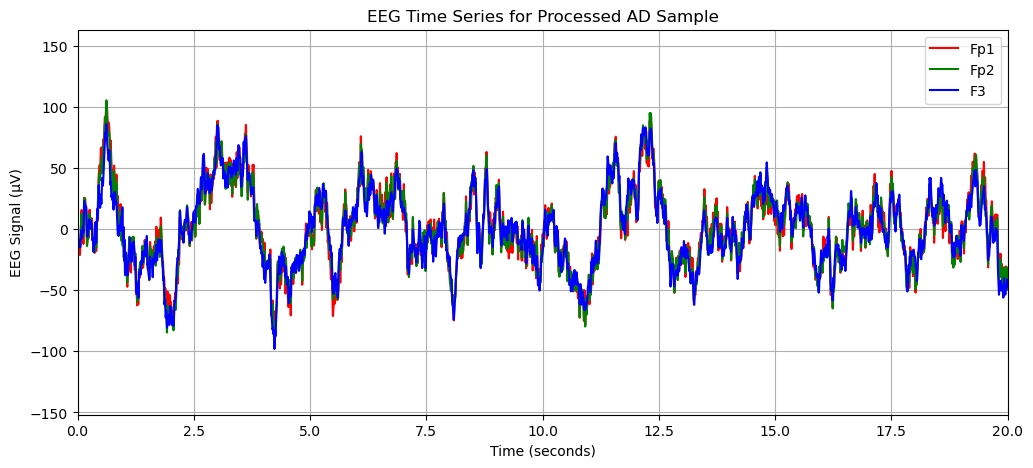

In [21]:

fs = 500  # Sampling rate (Hz)
num_samples = processed_AD.shape[1]  # 10000 samples

time = np.linspace(0, num_samples / fs, num_samples)

channels = ['Fp1', 'Fp2', 'F3']
colors = ['r', 'g', 'b']  # Red, Green, Blue

plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(time, processed_AD[i, :], label=channels[i], color=colors[i])

# Formatting
plt.xlim(0,20)
plt.xlabel("Time (seconds)")
plt.ylabel("EEG Signal (µV)")
plt.title("EEG Time Series for Processed AD Sample")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

## Original Code Apart From Here

In [22]:
freq_bands = {
    "Delta": (0.5, 4),
    "Theta": (4, 8),
    "Alpha": (8, 12),
    "Beta": (12, 30),
}

#### Spectrogram

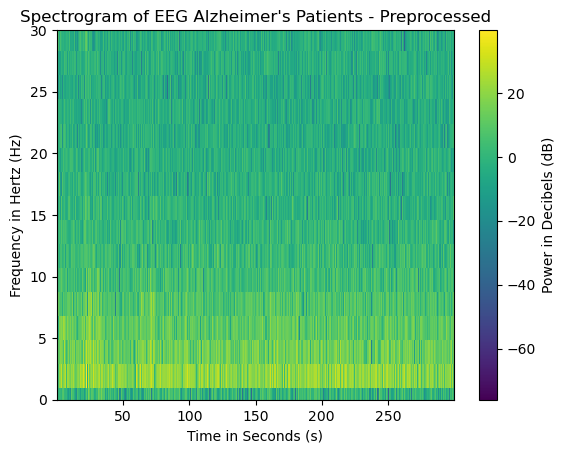

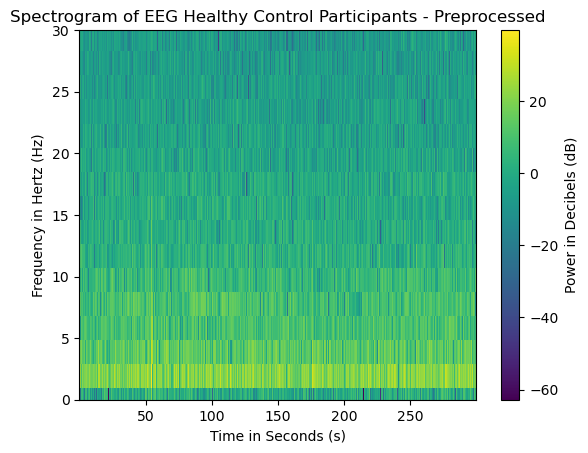

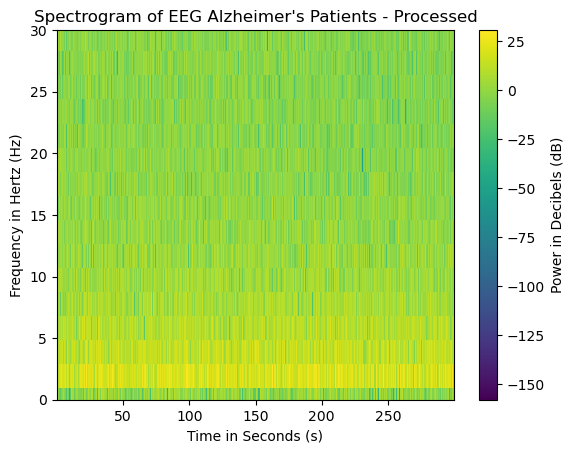

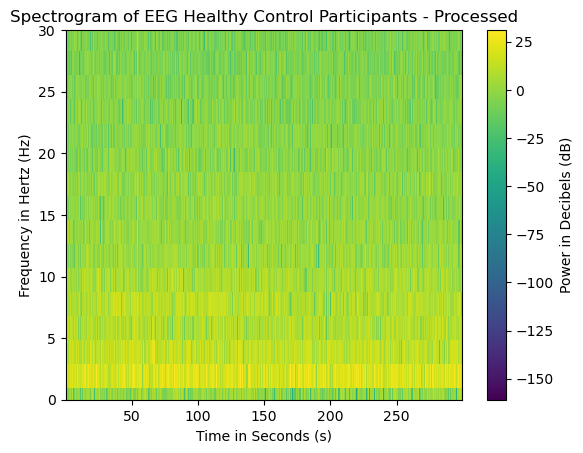

In [27]:
from scipy.signal import spectrogram

f, t, S = spectrogram(AD[0,:], fs=fs, nperseg=256)
plt.pcolor(t, f, 10 * np.log10(S))
plt.ylim(0,30)
plt.ylabel("Frequency in Hertz (Hz)")
plt.xlabel("Time in Seconds (s)")
plt.title("Spectrogram of EEG Alzheimer's Patients - Preprocessed")
plt.colorbar(label="Power in Decibels (dB)")
plt.show()

f, t, S = spectrogram(Control[0,:], fs=fs, nperseg=256)
plt.pcolor(t, f, 10 * np.log10(S))
plt.ylim(0,30)
plt.ylabel("Frequency in Hertz (Hz)")
plt.xlabel("Time in Seconds (s)")
plt.title("Spectrogram of EEG Healthy Control Participants - Preprocessed")
plt.colorbar(label="Power in Decibels (dB)")
plt.show()

f, t, S = spectrogram(processed_AD[0,:], fs=fs, nperseg=256)
plt.pcolor(t, f, 10 * np.log10(S))
plt.ylim(0,30)
plt.ylabel("Frequency in Hertz (Hz)")
plt.xlabel("Time in Seconds (s)")
plt.title("Spectrogram of EEG Alzheimer's Patients - Processed")
plt.colorbar(label="Power in Decibels (dB)")
plt.show()

f, t, S = spectrogram(processed_Control[0,:], fs=fs, nperseg=256)
plt.pcolor(t, f, 10 * np.log10(S))
plt.ylim(0,30)
plt.ylabel("Frequency in Hertz (Hz)")
plt.xlabel("Time in Seconds (s)")
plt.title("Spectrogram of EEG Healthy Control Participants - Processed")
plt.colorbar(label="Power in Decibels (dB)")
plt.show()


### Bandpass Filter